# - 주의사항!

2020년 9월 15일자 확인 사항입니다

엣지 브라우저로 웹 크롤링을 진행하고 종료한 경우에<br>
다음 컴퓨터 부팅 시 10개 정도의 cmd 창이 떴다가 종료되는 오류 사항이 있습니다

확인해보니 그렇게까지 치명적인 / 작동이 안되는 오류 사항은 아니지만<br>
부팅 때마다 이러면 굉장히 눈에 거슬리는 것도 사실인지라...

<b>가급적이면 저번 포스트를 참조하여 크롬으로 진행하는 것을 권유드립니다</b>

오류 화면 참조 : https://stackoverflow.com/questions/63791842/startup-windows-opens-many-instances-of-edge-each-with-errorfile-io-win-cc1

---

<만약 했을 경우에 해결 방법> - 2020년 10월 8일 업데이트

1. 작업관리자를 켠다 / Ctrl + Alt + Delete
2. 시작 프로그램 탭에 간다
3. 약 20개 정도의 모든 mesdege.exe를 각각 우클릭해서 사용안함으로 지정

귀찮긴 하지만 제일 단순하게 해결할 수 있는 방법인 것 같습니다

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지를 검색할까요? : "))
result = []

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)
t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_date = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_date):
        if find_data in tag1.text.strip():
            result.append([tag1.text.strip(),tag2.text,tag3.text,i+1])
            
        print(tag1.text.strip(),"|",tag2.text,"|",tag3.text)
        print("-" * 100)

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i+3) + ']').click()

print("<검색 결과는 다음과 같습니다>\n")
for seq in result:
    print("제목 : ",seq[0])
    print("부서 : ",seq[1])
    print("날짜 : ",seq[2])
    print("페이지 : ",seq[3])
    print("-" * 100)

t.sleep(5)
driver.close()

검색할 단어를 입력해주세요 : 장학금
총 몇 페이지를 검색할까요? : 10
2020 온택트 진로·취창업박람회 참여자 모집 안내 | 대학일자리센터  | 2020-09-14 
----------------------------------------------------------------------------------------------------
정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업) | 학생상담센터  | 2020-09-11 
----------------------------------------------------------------------------------------------------
2021학년도 1학기 일본권 파견 교환학생 모집 공고 | 국제교류부  | 2020-09-08 
----------------------------------------------------------------------------------------------------
2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내 | 학사관리과  | 2020-09-03 
----------------------------------------------------------------------------------------------------
2020학년도 학부 코로나19 특별장학금 신청 안내(2차) | 학생복지과  | 2020-08-21 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내 | 재무과  | 2020-08-12 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등

2020 온택트 진로·취창업박람회 참여자 모집 안내 | 대학일자리센터  | 2020-09-14 
----------------------------------------------------------------------------------------------------
정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업) | 학생상담센터  | 2020-09-11 
----------------------------------------------------------------------------------------------------
2021학년도 1학기 일본권 파견 교환학생 모집 공고 | 국제교류부  | 2020-09-08 
----------------------------------------------------------------------------------------------------
2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내 | 학사관리과  | 2020-09-03 
----------------------------------------------------------------------------------------------------
2020학년도 학부 코로나19 특별장학금 신청 안내(2차) | 학생복지과  | 2020-08-21 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내 | 재무과  | 2020-08-12 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등록금 납부 안내<수업연한경... | 재무과  | 2020-07-26 
---

2020 온택트 진로·취창업박람회 참여자 모집 안내 | 대학일자리센터  | 2020-09-14 
----------------------------------------------------------------------------------------------------
정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업) | 학생상담센터  | 2020-09-11 
----------------------------------------------------------------------------------------------------
2021학년도 1학기 일본권 파견 교환학생 모집 공고 | 국제교류부  | 2020-09-08 
----------------------------------------------------------------------------------------------------
2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내 | 학사관리과  | 2020-09-03 
----------------------------------------------------------------------------------------------------
2020학년도 학부 코로나19 특별장학금 신청 안내(2차) | 학생복지과  | 2020-08-21 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내 | 재무과  | 2020-08-12 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등록금 납부 안내<수업연한경... | 재무과  | 2020-07-26 
---

2020 온택트 진로·취창업박람회 참여자 모집 안내 | 대학일자리센터  | 2020-09-14 
----------------------------------------------------------------------------------------------------
정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업) | 학생상담센터  | 2020-09-11 
----------------------------------------------------------------------------------------------------
2021학년도 1학기 일본권 파견 교환학생 모집 공고 | 국제교류부  | 2020-09-08 
----------------------------------------------------------------------------------------------------
2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내 | 학사관리과  | 2020-09-03 
----------------------------------------------------------------------------------------------------
2020학년도 학부 코로나19 특별장학금 신청 안내(2차) | 학생복지과  | 2020-08-21 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내 | 재무과  | 2020-08-12 
----------------------------------------------------------------------------------------------------
2020-2학기 재(복)학생 등록금 납부 안내<수업연한경... | 재무과  | 2020-07-26 
---

# - 부경대 웹 홈페이지에서 공지사항 데이터들을 엑셀로 정리해보자

이번 시간은 번외편이라고 생각하시면 될 것 같습니다<br>
사실 저도 파일 뒤적거리다가 발견한거라...

저번 시간에는 우리가 부경대 웹 홈페이지에서 공지사항 데이터들을 뽑은 다음<br>
콘솔 창에 결과들을 출력하고 검색 결과까지 구현하는 데 성공하였습니다

따라서 위와 같은 코드를 완성했습니다

---

이번 시간에는 전체 결과는 엑셀에 정리하고 검색 결과만 콘솔 창에 띄우는 프로그램을 작성해봅시다

물론 반대로 하셔도 되고 아니면 본인의 입맛에 맞게 커스터마이징 하셔도 됩니다<br>
생각보다 엑셀에 정리하는 건 어렵지 않으니까요

In [ ]:
import pandas as pd

이번 시간에는 pandas라고 하는 외부 패키지가 필요합니다<br>
마찬가지로 각자의 가상 환경에 pip install pandas를 이용해서 설치를 진행해주세요

참고로 제가 설치해보니 numpy와 pytz도 동시에 설치되던데... 뭐 별 상관은 없는 것 같습니다

In [ ]:
meta_data = []

저번 시간에는 우리가 검색어에 맞는 데이터들을 저장하기 위해서 result라는 변수를 썼었습니다
이번 시간에는 전체 데이터들을 한꺼번에 보관하기 위한 meta_data라는 변수를 선언해줍시다

생각해보니 meta_data를 통해서 전체 데이터를 보관하고<br>
검색 데이터는 meta_data 안에서 꺼내거나 저장하기 전에 콘솔창에 띄우기만 하면 될 것 같네요

따라서 이번 시간에는 result 변수를 사용하지 않고 진행하겠습니다

---

여러모로 생각해보니 군데군데 코드를 수정하는 방식으로 진행해야 하는데<br>
여러분들이 그러면 많이 헷갈릴 것 같아서 일단 아예 처음부터 순차적으로 진행하겠습니다

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지를 검색할까요? : "))
meta_data = []

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)
t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

 - 관련 패키지 로드
 - url / 검색어 / 페이지 수 저장
 - 전체 결과를 모을 result를 선언
 - 엣지 드라이버 로드 및 url 열기
 - 전체 공지사항 페이지로 들어가기 위해서 콤보상자 / 버튼 클릭
 
순으로 진행하는 코드입니다

저번 시간과 동일하지만 하나 달라진 점이라면 meta_data라는 변수가 추가된 점입니다

In [1]:
for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_date = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_date):
        
        data_title = tag1.text.strip()
        data_author = tag2.text
        data_time = tag3.text
    
        if find_data in data_title:
             print("제목 : ",data_title)
             print("부서 : ",data_author)
             print("날짜 : ",data_time)
             print("페이지 : ",i+1)
             print("-" * 100)
                
        meta_data.append([data_title,data_author,data_time])
                
    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i+3) + ']').click()

NameError: name 'limit_num' is not defined

먼저 첫번째로 저번 시간에는 tag1.text.strip()를 그대로 처리했지만<br>
이번 시간에는 가시성을 위해서 data_title로 변수를 선언해서 처리하겠습니다<br>
다른 데이터들도 마찬가지로 이름을 정해서 처리하구요

메모리의 낭비가 조금 있긴 하지만 (=비슷한 변수를 굳이 선언할 필요는 없지만)<br>
보다 가시성 있는 데이터 처리를 위해서 진행합니다

---

두번째로는 검색어에 맞는 게시물일 경우에는 콘솔 창에 띄워주는 과정을 앞에 삽입하겠습니다<br>
어차피 모든 데이터는 meta_data안에 저장되기 때문이죠

---

마지막으로 전체 데이터를 meta_data안에 리스트 형태로 넣어줍니다<br>
여기까지만 한다면 거의 저번 과정과 유사하지만 전체 데이터를 저장할 수 있습니다

In [ ]:
save_data = pd.DataFrame(meta_data)
save_data.columns = ['title','author','time']

이제 pandas 패키지를 이용해서 작업을 진행할 차례입니다

우선 save_data라는 변수에 meta_data를 이용한 dataframe 객체를 선언해줍니다<br>
dataframe은 numpy와 유사하게 행과 열을 가지는 데이터 타입입니다<br>
엑셀이나 표를 상상하시면 이해가 쉬울 거에요

그 다음으로 각 열의 값들이 어떤 속성인지 = 어떤 소속인지 알려주기 위해서<br>
각 컬럼 = 속성을 정의해줍니다

일단 저는 제목 / 저자 / 시간으로 정했습니다<br>

---

한글로 진행하기에 앞서 우선 프로그램을 완성시키고 난 이후에 한글이 적용되는 지 알아보겠습니다

In [ ]:
save_data.to_csv('부경대학교 크롤링 결과.csv',encoding='cp949')

이제 각 속성에 맞는 곳에 데이터가 들어가게 되는데요

모든 데이터가 잘 정리되면 부경대학교 크롤링 결과.csv라는 확장자로 저장합시다<br>
그리고 우리가 모은 결과들은 전부 한글 데이터이므로<br>
저장할 수 있도록 따로 인코딩 역시 cp949라고 지정해줍시다

---

여기까지 해서 코드를 정리하고 실행해보겠습니다

In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지를 검색할까요? : "))
meta_data = []

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)
t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_date = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_date):

        data_title = tag1.text.strip()
        data_author = tag2.text
        data_time = tag3.text

        if find_data in data_title:
            print("제목 : ", data_title)
            print("부서 : ", data_author)
            print("날짜 : ", data_time)
            print("페이지 : ", i+1)
            print("-" * 100)

        meta_data.append([data_title, data_author, data_time])

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i + 3) + ']').click()

save_data = pd.DataFrame(meta_data)
save_data.columns = ['title','author','time']
save_data.to_csv('부경대학교 크롤링 결과.csv',encoding='cp949')

t.sleep(5)
driver.close()

검색할 단어를 입력해주세요 : 코로나
총 몇 페이지를 검색할까요? : 3
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  1
----------------------------------------------------------------------------------------------------
제목 :  코로나19 예방 수칙 (최신본)
부서 :  관리자 
날짜 :  2020-03-11 
페이지 :  1
----------------------------------------------------------------------------------------------------
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  2
----------------------------------------------------------------------------------------------------
제목 :  코로나19 예방 수칙 (최신본)
부서 :  관리자 
날짜 :  2020-03-11 
페이지 :  2
----------------------------------------------------------------------------------------------------
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  3
----------------------------------------------------------------------------------------------------
제목 :  코로나19 예방 수칙 (최신본)
부서 :  관리자 
날짜 :  2020-03-11 
페이지 :  3
-------------------------------

UnicodeEncodeError: 'cp949' codec can't encode character '\xa0' in position 42: illegal multibyte sequence

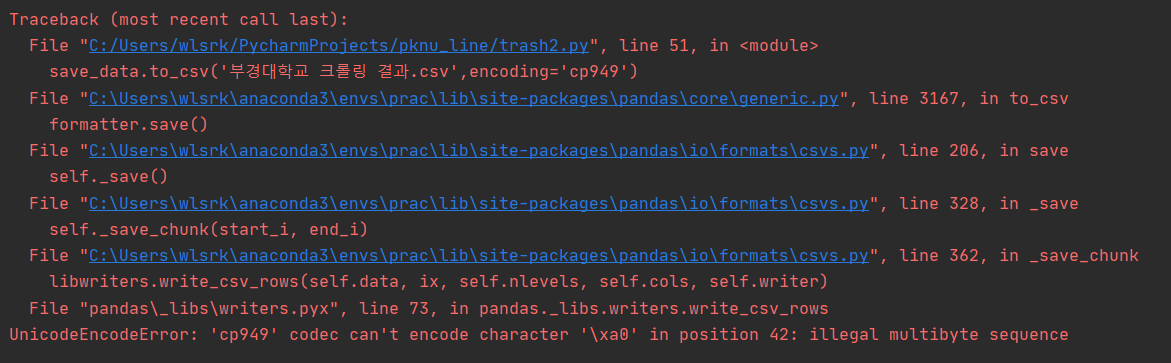

In [5]:
from IPython.display import Image

Image("img/pic1.png")

* *현재 상단의 코드들을 안 따라하셔도 됩니다*

이런! 바로 오류가 발생하네요...<br>
오류를 자세히 봅시다

\xa0라는 문자를 cp949 인코딩 방식에서 처리하지 못해서 생기는 오류라고 합니다<br>
뭐... 사실 \xa0는 공백과 동일한 문자입니다<br>
크롤링 당시 공백을 \xa0로 추출해서 생긴 문제로 보이네요

---

우리 눈에는 보이지 않는 데이터이지만 현재 오류를 일으키니 당장 조치를 취해야겠지요<br>
일단 그렇다면 제목 / 저자 / 시간 중에 어떤 친구가 \xa0를 가져오는지 살펴봅시다


In [7]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지를 검색할까요? : "))
meta_data = []

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)
t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_time = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_time):

        data_title = tag1.text.strip()
        data_author = tag2.text
        data_time = tag3.text

        # if find_data in data_title:
        #     print("제목 : ", data_title)
        #     print("부서 : ", data_author)
        #     print("날짜 : ", data_time)
        #     print("페이지 : ", i)
        #     print("-" * 100)

        meta_data.append([data_title, data_author, data_time])
        print(meta_data)

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i + 3) + ']').click()

# save_data = pd.DataFrame(meta_data)
# save_data.columns = ['title','author','time']
# save_data.to_csv('부경대학교 크롤링 결과.csv',encoding='cp949')

t.sleep(5)
driver.close()

검색할 단어를 입력해주세요 : 코로나
총 몇 페이지를 검색할까요? : 3
[['정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업)', '학생상담센터\xa0', '2020-09-11\xa0']]
[['정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업)', '학생상담센터\xa0', '2020-09-11\xa0'], ['2021학년도 1학기 일본권 파견 교환학생 모집 공고', '국제교류부\xa0', '2020-09-08\xa0']]
[['정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업)', '학생상담센터\xa0', '2020-09-11\xa0'], ['2021학년도 1학기 일본권 파견 교환학생 모집 공고', '국제교류부\xa0', '2020-09-08\xa0'], ['2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내', '학사관리과\xa0', '2020-09-03\xa0']]
[['정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업)', '학생상담센터\xa0', '2020-09-11\xa0'], ['2021학년도 1학기 일본권 파견 교환학생 모집 공고', '국제교류부\xa0', '2020-09-08\xa0'], ['2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내', '학사관리과\xa0', '2020-09-03\xa0'], ['2020학년도 학부 코로나19 특별장학금 신청 안내(2차)', '학생복지과\xa0', '2020-08-21\xa0']]
[['정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업)', '학생상담센터\xa0', '2020-09-11\xa0'], ['2021학년도 1학기 일본권 파견 교환학생 모집 공고', '국제교류부\xa0', '2020-09-08\xa0'], ['2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내', '학사관리과\xa0', '2020-09-03\xa0'], ['2020학년도 학부 코로나19 특별장학금 신청 안내(2차)', '학생복지과\xa0', '2020-

[['정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업)', '학생상담센터\xa0', '2020-09-11\xa0'], ['2021학년도 1학기 일본권 파견 교환학생 모집 공고', '국제교류부\xa0', '2020-09-08\xa0'], ['2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내', '학사관리과\xa0', '2020-09-03\xa0'], ['2020학년도 학부 코로나19 특별장학금 신청 안내(2차)', '학생복지과\xa0', '2020-08-21\xa0'], ['2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내', '재무과\xa0', '2020-08-12\xa0'], ['2020-2학기 재(복)학생 등록금 납부 안내<수업연한경...', '재무과\xa0', '2020-07-26\xa0'], ['코로나19 예방 수칙 (최신본)', '관리자\xa0', '2020-03-11\xa0'], ["▶2020 '창의충전소' 개최 - 참가신청 안내◀", '공학교육혁신센터\xa0', '2020-09-14 15:48\xa0'], ['[OCU컨소시엄] 시스템사용료 납부기간 연장 및 출석 안내', '학사관리과\xa0', '2020-09-14 15:37\xa0'], ['★대(공)기업 직무적성검사 온라인 모의고사 실시 안내★', '인재개발원\xa0', '2020-09-14 15:02\xa0'], ['[채용공고] 강의제작 운영 지원 온라인 원격 도우미 채용 공고', '학사관리과\xa0', '2020-09-14 14:41\xa0'], ['[채용공고] 부경대학교 4차 산업혁명 혁신선도대학 사업단 교육지원 ...', '4차 산업혁명 혁신선도대학 사업단\xa0', '2020-09-14 13:47\xa0'], ['2020-2학기 중소기업 취업연계 장학금(희망사다리1) 학생 신청 ...', '학생복지과\xa0', '2020-09-14 13:32\xa0'], ['입시업무 지원 일용직원 채용공고', '입학관리과\xa0', '2020-09-14 13:28\xa

[['정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업)', '학생상담센터\xa0', '2020-09-11\xa0'], ['2021학년도 1학기 일본권 파견 교환학생 모집 공고', '국제교류부\xa0', '2020-09-08\xa0'], ['2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내', '학사관리과\xa0', '2020-09-03\xa0'], ['2020학년도 학부 코로나19 특별장학금 신청 안내(2차)', '학생복지과\xa0', '2020-08-21\xa0'], ['2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내', '재무과\xa0', '2020-08-12\xa0'], ['2020-2학기 재(복)학생 등록금 납부 안내<수업연한경...', '재무과\xa0', '2020-07-26\xa0'], ['코로나19 예방 수칙 (최신본)', '관리자\xa0', '2020-03-11\xa0'], ["▶2020 '창의충전소' 개최 - 참가신청 안내◀", '공학교육혁신센터\xa0', '2020-09-14 15:48\xa0'], ['[OCU컨소시엄] 시스템사용료 납부기간 연장 및 출석 안내', '학사관리과\xa0', '2020-09-14 15:37\xa0'], ['★대(공)기업 직무적성검사 온라인 모의고사 실시 안내★', '인재개발원\xa0', '2020-09-14 15:02\xa0'], ['[채용공고] 강의제작 운영 지원 온라인 원격 도우미 채용 공고', '학사관리과\xa0', '2020-09-14 14:41\xa0'], ['[채용공고] 부경대학교 4차 산업혁명 혁신선도대학 사업단 교육지원 ...', '4차 산업혁명 혁신선도대학 사업단\xa0', '2020-09-14 13:47\xa0'], ['2020-2학기 중소기업 취업연계 장학금(희망사다리1) 학생 신청 ...', '학생복지과\xa0', '2020-09-14 13:32\xa0'], ['입시업무 지원 일용직원 채용공고', '입학관리과\xa0', '2020-09-14 13:28\xa

 - 글자가 헷갈릴 것 같아 meta_date를 meta_time으로 변경하였습니다
 
아하! 지금 저자 / 시간 데이터에 \xa0가 들어가있네요

그러면 간단하게 문자열 치환 함수인 replace를 사용해서<br>
\xa0를 없애주는 작업이 필요할 것 같습니다

따라서 데이터를 meta_data 안에 저장하기 전에 처리 작업을 한번 넣어줍시다

In [16]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지를 검색할까요? : "))
meta_data = []

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)
t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_time = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_time):

        data_title = tag1.text.strip()
        data_author = tag2.text
        data_time = tag3.text

        if find_data in data_title:
            print("제목 : ", data_title)
            print("부서 : ", data_author)
            print("날짜 : ", data_time)
            print("페이지 : ", i+1)
            print("-" * 100)
            
        data_author = data_author.replace("\xa0","")
        data_time = data_time.replace("\xa0", "")

        meta_data.append([data_title, data_author, data_time])

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i + 3) + ']').click()

save_data = pd.DataFrame(meta_data)
save_data.columns = ['title','author','time']
save_data.to_csv('부경대학교 크롤링 결과.csv',encoding='cp949')

t.sleep(5)
driver.close()

검색할 단어를 입력해주세요 : 장학
총 몇 페이지를 검색할까요? : 4
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  1
----------------------------------------------------------------------------------------------------
제목 :  2020-2학기 중소기업 취업연계 장학금(희망사다리1) 학생 신청 ...
부서 :  학생복지과 
날짜 :  2020-09-14 13:32 
페이지 :  1
----------------------------------------------------------------------------------------------------
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  2
----------------------------------------------------------------------------------------------------
제목 :  청년창업농육성장학생 추가모집 선발관련 안내
부서 :  학생복지과 
날짜 :  2020-09-10 
페이지 :  2
----------------------------------------------------------------------------------------------------
제목 :  (재)고속도로장학재단 2020년도 고속도로 장학생 선발 안내
부서 :  학생복지과 
날짜 :  2020-09-08 
페이지 :  2
----------------------------------------------------------------------------------------------------
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜

data_author = data_author.replace("\xa0","")<br>
data_date = data_date.replace("\xa0", "")

위 두 코드를 사용해서 \xa0라는 글자는 찾아서 알아서 삭제해줍시다

자 이제 작업이 끝났으니 소스 코드가 저장된 폴더에 들어가서<br>
잘 생성되었는지 살펴볼게요


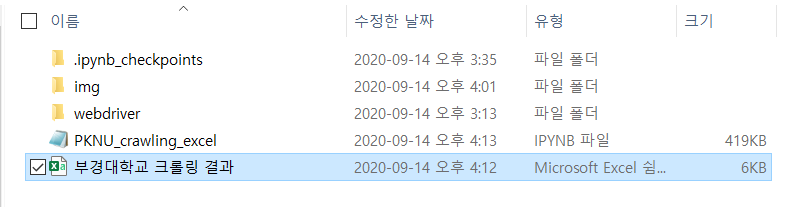

In [11]:
Image("img/pic2.png")

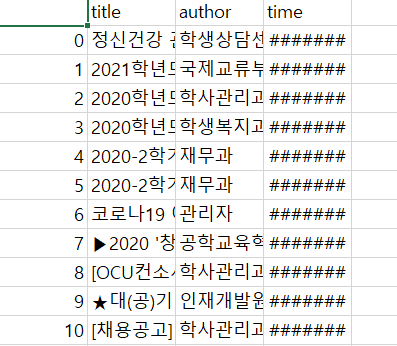

In [13]:
Image("img/pic3.png")

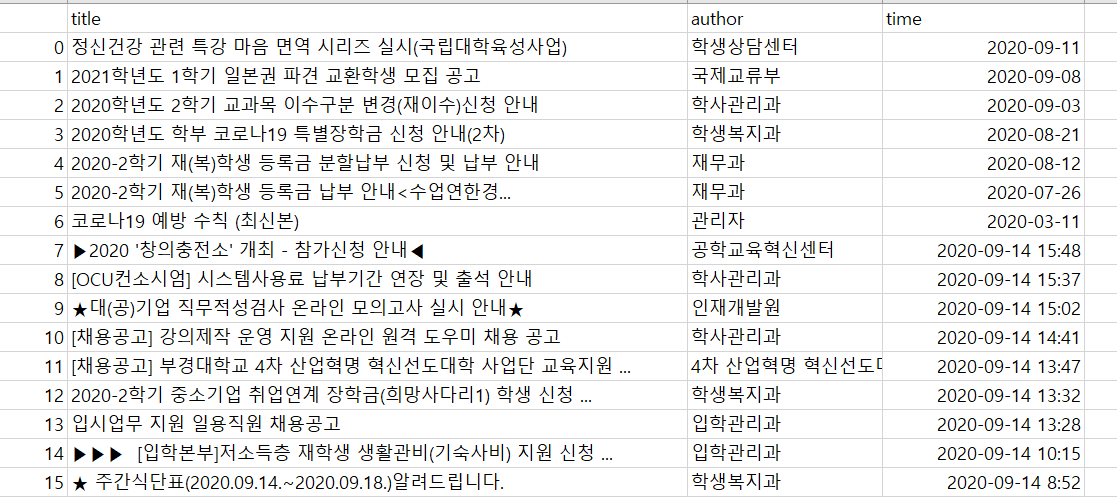

In [15]:
Image("img/pic4.png")

문제없이 엑셀 파일도 생성되었고 엑셀 파일 내 내용도 잘 저장된 것을 볼 수 있습니다

다만 처음 파일을 열었을 때 컬럼의 길이가 살짝 부족해서 데이터들이 잘 안보이는 게 보이네요<br>
물론 수동으로 길이를 조절해서 보면 정상적으로 출력되지만 살짝 아쉬운 부분입니다

---

그러면 어떻게해야 좀 이쁘게 보일까?

우선 엑셀 파일로 저장해서 보는 방법도 있지만 사실 Jupyter Notebook 상에서도 dataframe을 출력하는 것이 가능합니다<br>
좀 더 보기 편리하게 출력될 뿐더러 너비를 커스터마이징해서 볼 수 있는데요

다음과 같은 코드를 추가하면 됩니다
 - pd.set_option('display.max.colwidth', 70)

In [19]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지를 검색할까요? : "))
meta_data = []

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)
t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_time = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_time):

        data_title = tag1.text.strip()
        data_author = tag2.text
        data_time = tag3.text

        if find_data in data_title:
            print("제목 : ", data_title)
            print("부서 : ", data_author)
            print("날짜 : ", data_time)
            print("페이지 : ", i+1)
            print("-" * 100)
            
        data_author = data_author.replace("\xa0","")
        data_time = data_time.replace("\xa0", "")

        meta_data.append([data_title, data_author, data_time])

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i + 3) + ']').click()

save_data = pd.DataFrame(meta_data)
pd.set_option('display.max.colwidth', 70)
save_data.columns = ['title','author','time']
save_data.to_csv('부경대학교 크롤링 결과.csv',encoding='cp949')

t.sleep(5)
driver.close()

save_data

검색할 단어를 입력해주세요 : 장학
총 몇 페이지를 검색할까요? : 3
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  1
----------------------------------------------------------------------------------------------------
제목 :  2020-2학기 중소기업 취업연계 장학금(희망사다리1) 학생 신청 ...
부서 :  학생복지과 
날짜 :  2020-09-14 13:32 
페이지 :  1
----------------------------------------------------------------------------------------------------
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  2
----------------------------------------------------------------------------------------------------
제목 :  청년창업농육성장학생 추가모집 선발관련 안내
부서 :  학생복지과 
날짜 :  2020-09-10 
페이지 :  2
----------------------------------------------------------------------------------------------------
제목 :  (재)고속도로장학재단 2020년도 고속도로 장학생 선발 안내
부서 :  학생복지과 
날짜 :  2020-09-08 
페이지 :  2
----------------------------------------------------------------------------------------------------
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜

,title,author,time
0,정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업),학생상담센터,2020-09-11
1,2021학년도 1학기 일본권 파견 교환학생 모집 공고,국제교류부,2020-09-08
2,2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내,학사관리과,2020-09-03
3,2020학년도 학부 코로나19 특별장학금 신청 안내(2차),학생복지과,2020-08-21
4,2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내,재무과,2020-08-12
...,...,...,...
61,2020학년도 2학기 학부 (수강신청변경기간 이후)수강신청취소 안내,학사관리과,2020-09-03
62,「2020년 울산인재평생교육진흥원 하반기 장학생 선발 공고」 안내,학생복지과,2020-09-03
63,2020년도 포항시장학회 장학생 선발공고 안내,학생복지과,2020-09-03
64,[채용공고] 부경대학교 4차 산업혁명 혁신선도대학 사업단 교육지원 ...,4차 산업혁명 혁신선도대학 사업단,2020-09-03


현재 모든 엑셀의 내용들이 Jupyter Notebook에 잘 출력이 되는 걸 보실 수 있을 겁니다

다만 모든 행들이 표현되지는 않죠<br>
이럴 때에는 다음과 같은 코드를 추가하면 됩니다

 - pd.set_option('display.max_row', 500)
 
출력되는 행의 개수의 제한을 좀 더 늘려줍시다

In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지를 검색할까요? : "))
meta_data = []

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)
t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_time = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_time):

        data_title = tag1.text.strip()
        data_author = tag2.text
        data_time = tag3.text

        if find_data in data_title:
            print("제목 : ", data_title)
            print("부서 : ", data_author)
            print("날짜 : ", data_time)
            print("페이지 : ", i+1)
            print("-" * 100)
            
        data_author = data_author.replace("\xa0","")
        data_time = data_time.replace("\xa0", "")

        meta_data.append([data_title, data_author, data_time])

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i + 3) + ']').click()

# 여기서부터는 pandas 조작 절차
    
save_data = pd.DataFrame(meta_data)

pd.set_option('display.max.colwidth', 70)
pd.set_option('display.max_row', 500)

save_data.columns = ['제목','부서','시간']
save_data.to_csv('부경대학교 크롤링 결과.csv',encoding='cp949')

t.sleep(5)
driver.close()

save_data

검색할 단어를 입력해주세요 : 장학금
총 몇 페이지를 검색할까요? : 3
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  1
----------------------------------------------------------------------------------------------------
제목 :  2020-2학기 중소기업 취업연계 장학금(희망사다리1) 학생 신청 ...
부서 :  학생복지과 
날짜 :  2020-09-14 13:32 
페이지 :  1
----------------------------------------------------------------------------------------------------
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  2
----------------------------------------------------------------------------------------------------
제목 :  2020학년도 학부 코로나19 특별장학금 신청 안내(2차)
부서 :  학생복지과 
날짜 :  2020-08-21 
페이지 :  3
----------------------------------------------------------------------------------------------------


,제목,부서,시간
0,2020 온택트 진로·취창업박람회 참여자 모집 안내,대학일자리센터,2020-09-14 16:45
1,정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업),학생상담센터,2020-09-11
2,2021학년도 1학기 일본권 파견 교환학생 모집 공고,국제교류부,2020-09-08
3,2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내,학사관리과,2020-09-03
4,2020학년도 학부 코로나19 특별장학금 신청 안내(2차),학생복지과,2020-08-21
5,2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내,재무과,2020-08-12
6,2020-2학기 재(복)학생 등록금 납부 안내<수업연한경...,재무과,2020-07-26
7,코로나19 예방 수칙 (최신본),관리자,2020-03-11
8,2020 온택트 진로·취창업박람회 참여자 모집 안내,대학일자리센터,2020-09-14 16:45
9,▶2020 '창의충전소' 개최 - 참가신청 안내◀,공학교육혁신센터,2020-09-14 15:48


정상적으로 모든 행들이 출력이 되네요!<br>
지금 다시 보니 검색 결과도 콘솔 창이 아니라 dataframe으로 깔끔하게 정리하는 방안이 좀 더 좋아보입니다<br>
덤으로 아까 영어로 처리했던 속성 제목도 한글로 무사히 처리가 되네요

뭐 각자의 입맛에 맞게 정리하면 되겠죠?

---

여기까지 하고 마무리해도 되지만, 하단에 마지막으로 중복을 제거해서<br>
완벽하게 전체 데이터를 정리하는 과정을 거치도록 하겠습니다

음... 여기서 난점이 하나 발생하는데요<br>
제목 / 부서 / 날짜를 처리할 때
 - 하나의 리스트 형태로 저장할 경우 : dataframe을 처리할 때 편함 / 중복 검사하기에는 조금 곤란
 - 세 개의 리스트 형태로 저장할 경우 : 중복 검사하기에는 편함 / dataframe을 처리할 때 조금 곤란
 
이렇게 되어버리네요... 음...

일단은 하나의 리스트 형태에서 검색을 하는 형태를 구현하겠습니다

In [ ]:
if data_title in 제목_리스트:
    pass or continue

일단은 추상적인 생각은 다음과 같습니다

우리가 추출한 data_title이 제목_리스트에 하나라도 일치하는 게 있다면<br>
그냥 pass하는 형태죠

다만 반복문의 특성상 pass보다는 continue가 더 나을 듯 합니다

---

각 제목들은 meta_data라는 큰 리스트 안에 각 요소들의 첫 번째 원소입니다

약간 풀어서 설명하면 meta_data[0][0] / meta_data[1][0]...<br>
이런식으로 진행되겠네요

---

이럴 때에는 in 함수를 쓰지는 못합니다<br>
각각의 요소들에게 직접 접근해서 일치하는 지 여부를 알아내야하기 때문이죠<br>
아까 중복 검사하기에는 조금 곤란하다는 부분이 바로 이것입니다

우선은 직접 접근해서 일치하는 지 여부를 알아보죠<br>

In [6]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

import time as t

base_url = "http://www.pknu.ac.kr/usrBoardActn.do?p_bm_idx=5&p_boardcode=PK10000005&p_sbsidx=2"

find_data = input("검색할 단어를 입력해주세요 : ")
limit_num = int(input("총 몇 페이지를 검색할까요? : "))
meta_data = []

driver = webdriver.Edge(
    executable_path="webdriver/msedgedriver.exe"
)
driver.get(base_url)
t.sleep(5)

driver.find_element_by_xpath('//*[@id="p_sbsidx"]/option[1]').click()
driver.find_element_by_xpath('//*[@id="cateForm"]/div/input').click()

for i in range(limit_num):
    t.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    meta_content = soup.select('td[class=title]')
    meta_author = soup.select('td[class=author]')
    meta_time = soup.select('td[class=date]')

    for tag1, tag2, tag3 in zip(meta_content, meta_author, meta_time):

        data_title = tag1.text.strip()
        data_author = tag2.text
        data_time = tag3.text
        status = False
        
        for temp in meta_data:
            if data_title == temp[0]:
                status = True
                
        if status:
            continue

        if find_data in data_title:
            print("제목 : ", data_title)
            print("부서 : ", data_author)
            print("날짜 : ", data_time)
            print("페이지 : ", i+1)
            print("-" * 100)
            
        data_author = data_author.replace("\xa0","")
        data_time = data_time.replace("\xa0", "")

        meta_data.append([data_title, data_author, data_time])

    driver.find_element_by_xpath('//*[@id="contents"]/div[4]/div[2]/a[' + str(i + 3) + ']').click()

# 여기서부터는 pandas 조작 절차
    
save_data = pd.DataFrame(meta_data)

pd.set_option('display.max.colwidth', 70)
pd.set_option('display.max_row', 500)

save_data.columns = ['제목','부서','시간']
save_data.to_csv('부경대학교 크롤링 결과.csv',encoding='cp949')

t.sleep(5)
driver.close()

save_data

검색할 단어를 입력해주세요 : 파이썬
총 몇 페이지를 검색할까요? : 5
제목 :  2020 코딩 특강(파이썬) 수강 안내
부서 :  미래교육혁신본부 
날짜 :  2020-09-02 
페이지 :  4
----------------------------------------------------------------------------------------------------


,제목,부서,시간
0,2020 온택트 진로·취창업박람회 참여자 모집 안내,대학일자리센터,2020-09-14 16:45
1,정신건강 관련 특강 마음 면역 시리즈 실시(국립대학육성사업),학생상담센터,2020-09-11
2,2021학년도 1학기 일본권 파견 교환학생 모집 공고,국제교류부,2020-09-08
3,2020학년도 2학기 교과목 이수구분 변경(재이수)신청 안내,학사관리과,2020-09-03
4,2020학년도 학부 코로나19 특별장학금 신청 안내(2차),학생복지과,2020-08-21
5,2020-2학기 재(복)학생 등록금 분할납부 신청 및 납부 안내,재무과,2020-08-12
6,2020-2학기 재(복)학생 등록금 납부 안내<수업연한경...,재무과,2020-07-26
7,코로나19 예방 수칙 (최신본),관리자,2020-03-11
8,▶2020 '창의충전소' 개최 - 참가신청 안내◀,공학교육혁신센터,2020-09-14 15:48
9,[OCU컨소시엄] 시스템사용료 납부기간 연장 및 출석 안내,학사관리과,2020-09-14 15:37


이렇게해서 중복이 제거된 리스트가 완성되었습니다

---

여기까지 부경대 웹 홈페이지에서 공지사항 데이터들을 엑셀로 정리해보자 였습니다<br>
감사합니다!